In [1]:
import numpy as np


In [95]:
import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)

x = np.arange(3)
V = np.array([1,1,1])
K = thomas_fermi.create_K_matrix(x)
mu_l = (2,2)
N_dot = [1]
n,mu = thomas_fermi.solve_thomas_fermi(x,V,K,mu_l,N_dot)
E = thomas_fermi.calculate_thomas_fermi_energy(V,K,n,mu)


-3.2656378419e-15


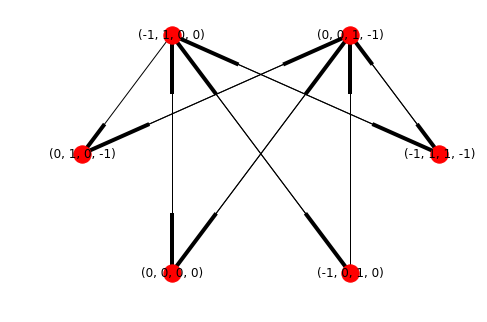

In [91]:
import markov_graph
reload(markov_graph)
graph_model = (1,1)
battery_weight = 1000
kT = 0.1
physics = (x,V,K,mu_l,battery_weight,kT)
G = markov_graph.generate_graph(graph_model, physics)

#print G.nodes(data=True)
#print G.edges(data=True)

import networkx as nx
%matplotlib inlinegt
nx.draw_shell(G,with_labels=True)

print markov_graph.get_current(G)